Importing Libraries

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from tqdm import tqdm

from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

import warnings
warnings.filterwarnings('ignore')

importing File Location

In [67]:
file_path= r'c:\Users\Bharath Marupatla\OneDrive\Documents\analyst\ml\KNN project\music_data.csv'
music_data = pd.read_csv(file_path)

Data Exploration

In [68]:
music_data.head()

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop


In [69]:
music_data.isnull().sum()

artist              0
song                0
duration_ms         0
explicit            0
year                0
popularity          0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
genre               0
dtype: int64

In [70]:
music_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist            2000 non-null   object 
 1   song              2000 non-null   object 
 2   duration_ms       2000 non-null   int64  
 3   explicit          2000 non-null   bool   
 4   year              2000 non-null   int64  
 5   popularity        2000 non-null   int64  
 6   danceability      2000 non-null   float64
 7   energy            2000 non-null   float64
 8   key               2000 non-null   int64  
 9   loudness          2000 non-null   float64
 10  mode              2000 non-null   int64  
 11  speechiness       2000 non-null   float64
 12  acousticness      2000 non-null   float64
 13  instrumentalness  2000 non-null   float64
 14  liveness          2000 non-null   float64
 15  valence           2000 non-null   float64
 16  tempo             2000 non-null   float64


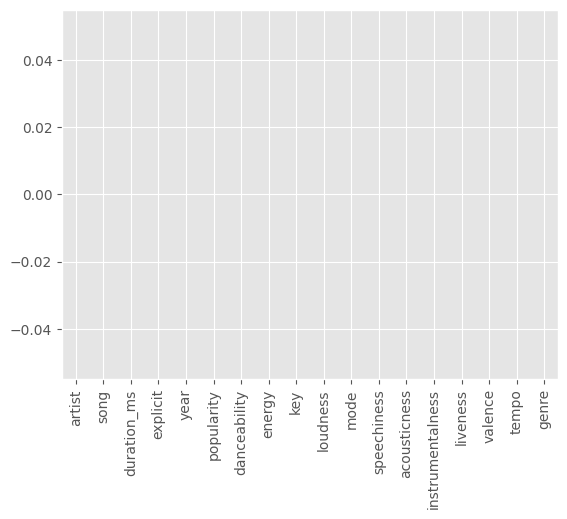

In [71]:
music_data.isnull().sum().plot.bar()
plt.show()

In [72]:
music_data.select_dtypes(np.number)

,duration_ms,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,211160,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053
1,167066,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726
2,250546,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859
3,224493,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992
4,200560,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,181026,2019,79,0.842,0.734,1,-5.065,0,0.0588,0.0427,0.000000,0.1060,0.952,137.958
1996,178426,2019,78,0.552,0.702,9,-5.707,1,0.1570,0.1170,0.000021,0.1050,0.564,169.994
1997,200593,2019,69,0.847,0.678,9,-8.635,1,0.1090,0.0669,0.000000,0.2740,0.811,97.984
1998,171029,2019,75,0.741,0.520,8,-7.513,1,0.0656,0.4500,0.000002,0.2220,0.347,102.998


In [73]:
music_data["explicit"] = music_data["explicit"].astype(int)

In [74]:
music_data.head()

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,0,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,0,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,0,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,0,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,0,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop


In [75]:
music_features=music_data.select_dtypes(np.number)
corr_matrix = music_features.corr()
corr_matrix.style.background_gradient(cmap='coolwarm')

,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
duration_ms,1.000000,0.123595,-0.316534,0.050617,-0.060057,-0.078763,-0.002560,-0.079912,-0.003848,0.066998,0.010923,-0.004208,0.024941,-0.116870,-0.028603
explicit,0.123595,1.000000,0.078477,0.046605,0.248845,-0.162462,0.003320,-0.089829,0.049576,0.417343,-0.033523,-0.082522,0.008884,-0.045455,0.013221
year,-0.316534,0.078477,1.000000,-0.003825,0.033532,-0.108644,0.007380,0.017479,-0.007358,0.001111,0.033809,-0.050265,-0.027037,-0.209365,0.076867
popularity,0.050617,0.046605,-0.003825,1.000000,-0.003546,-0.014021,0.014823,0.030632,-0.021353,0.021162,0.024619,-0.048059,-0.009856,-0.016142,0.014288
danceability,-0.060057,0.248845,0.033532,-0.003546,1.000000,-0.104038,0.032731,-0.033315,-0.067528,0.145590,-0.065429,0.023207,-0.126413,0.403178,-0.173418
energy,-0.078763,-0.162462,-0.108644,-0.014021,-0.104038,1.000000,-0.003446,0.651016,-0.040651,-0.057018,-0.445469,0.037861,0.156761,0.334474,0.153719
key,-0.002560,0.003320,0.007380,0.014823,0.032731,-0.003446,1.000000,-0.007474,-0.153182,0.007147,0.002365,-0.008173,-0.033071,0.036977,-0.001431
loudness,-0.079912,-0.089829,0.017479,0.030632,-0.033315,0.651016,-0.007474,1.000000,-0.028133,-0.076388,-0.310039,-0.104925,0.102159,0.232150,0.080709
mode,-0.003848,0.049576,-0.007358,-0.021353,-0.067528,-0.040651,-0.153182,-0.028133,1.000000,-0.000077,0.005744,-0.038613,0.025439,-0.074681,0.048434
speechiness,0.066998,0.417343,0.001111,0.021162,0.145590,-0.057018,0.007147,-0.076388,-0.000077,1.000000,0.000394,-0.062954,0.061172,0.073605,0.057747


In [76]:
from sklearn.preprocessing import StandardScaler
import plotly.express as px

100%|██████████| 13/13 [00:06<00:00,  2.13it/s]


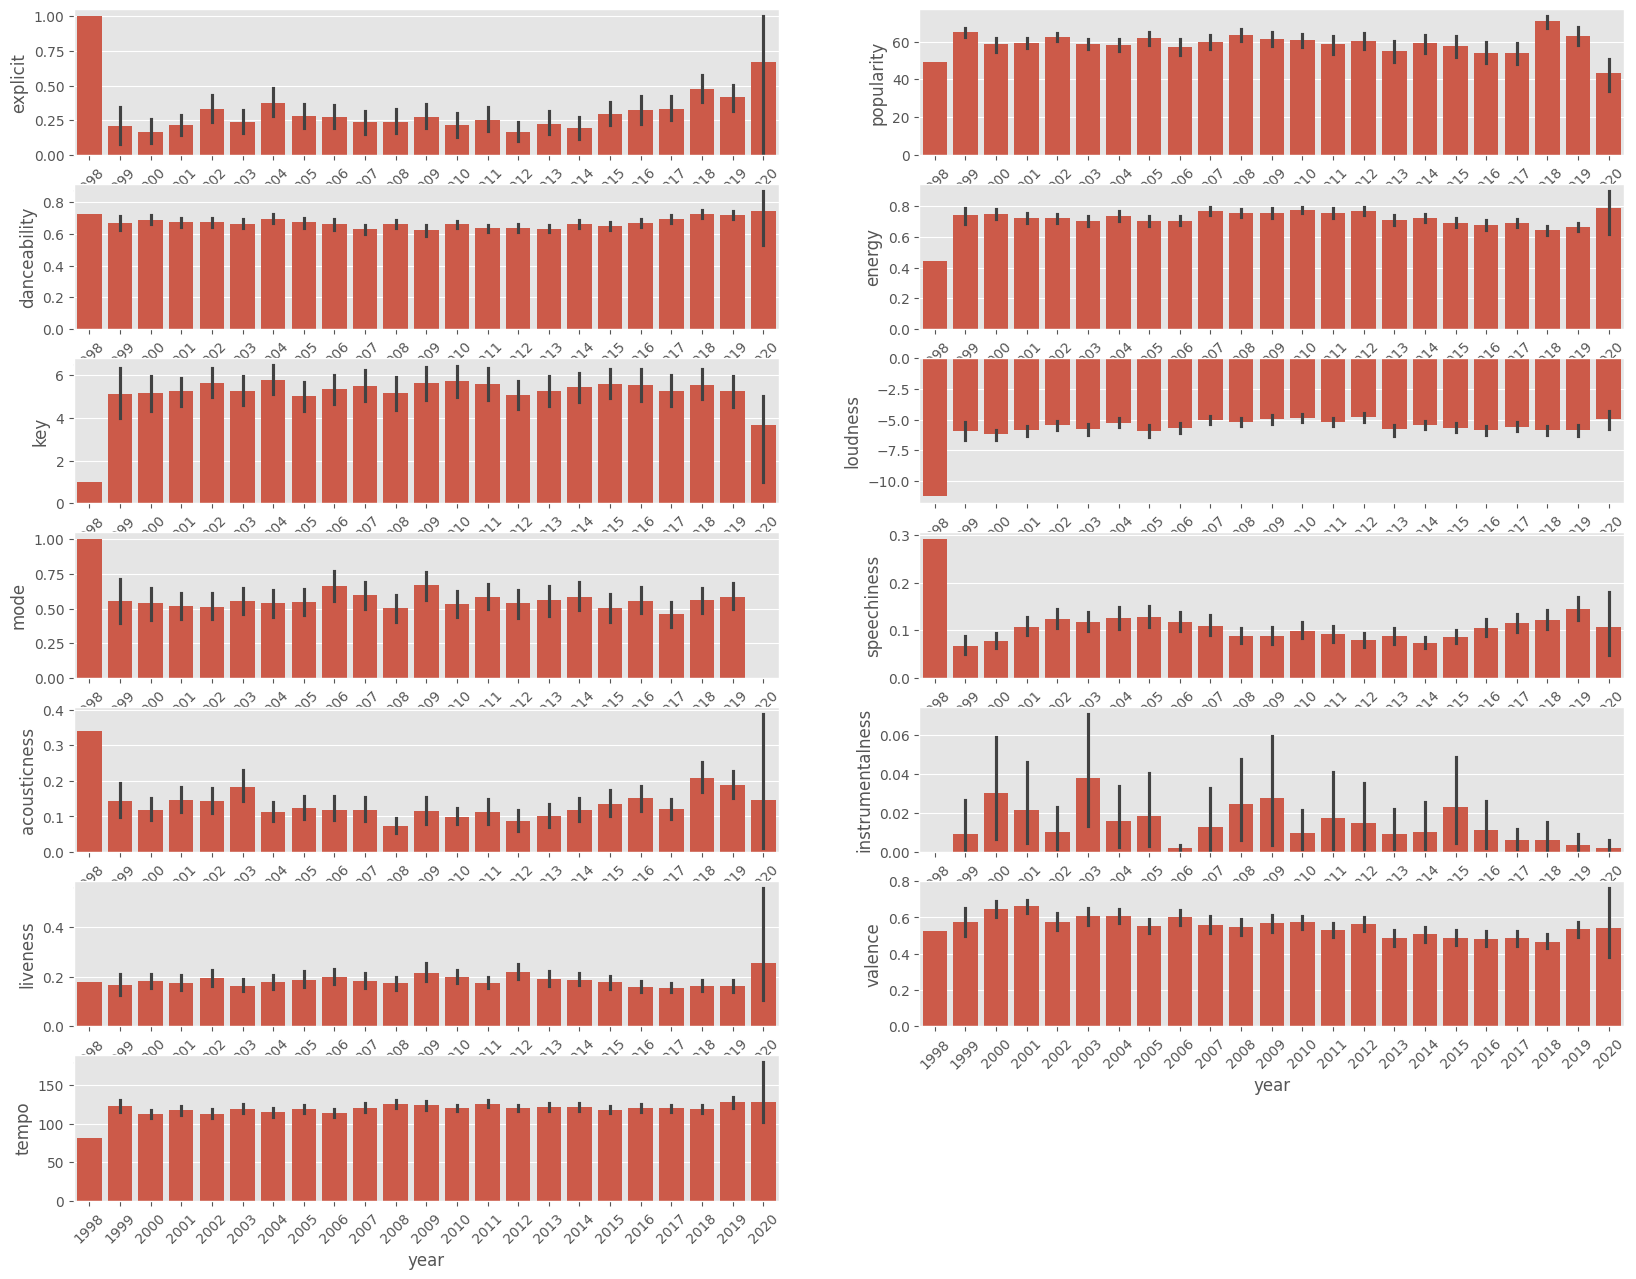

In [77]:
visual_data = music_data.drop(columns=['song', 'artist', 'year', 'genre'])

plt.figure(figsize=(20, 20))
for i in tqdm(np.arange(1, len(visual_data.columns))):
    plt.subplot(9, 2, i)
    sb.barplot(x=music_data.year,y=visual_data[visual_data.columns[i]])
    plt.xticks(rotation=45);
plt.show()

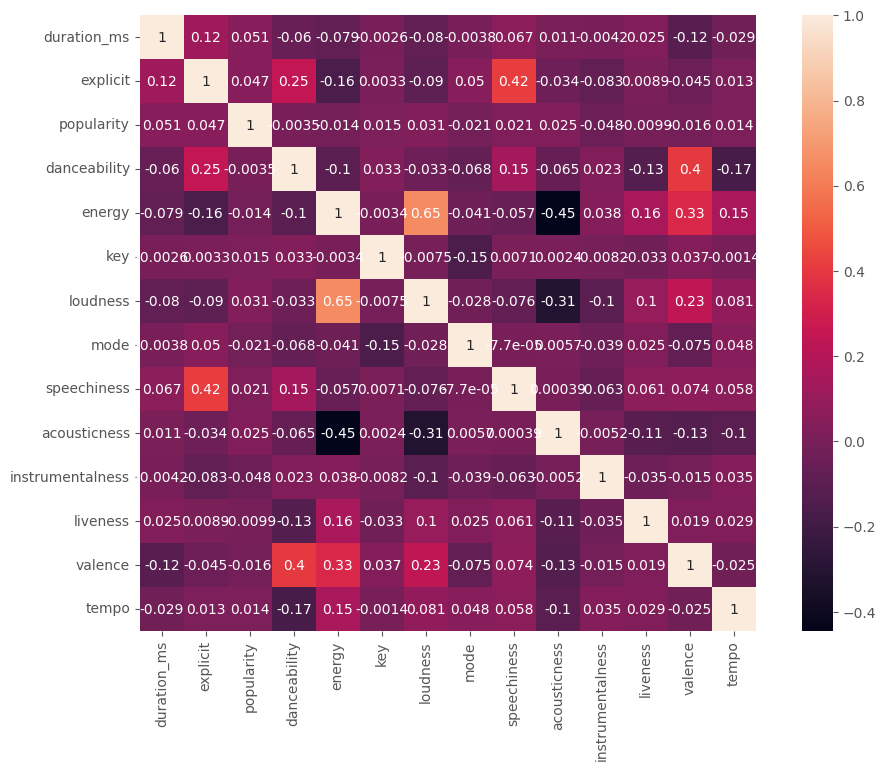

In [78]:
plt.subplots(figsize=(12, 8))
sb.heatmap(visual_data.corr(), annot=True, square=True)
plt.show()

One Hot Encoding of Genre

In [79]:
from sklearn.preprocessing import OneHotEncoder
unique_genres = set()
for genre_list in music_data["genre"]:
    genres = genre_list.split(",")
    for genre in genres:
        unique_genres.add(genre)

# Create a one-hot encoding for the genre column
encoder = OneHotEncoder()
encoder.fit([[genre] for genre in unique_genres])
# Encode the genre data
encoded_genres = []
for genres in music_data["genre"]:
    genres = genres.split(",")
    one_hot = [0 if genre not in genres else 1 for genre in unique_genres]
    encoded_genres.append(one_hot)

In [80]:
import os
import seaborn as sns
import plotly.express as px 
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import euclidean_distances
from scipy.spatial.distance import cdist

import warnings
warnings.filterwarnings("ignore")

Function for Normalizing Column

In [81]:
def normalize_column(col):
    max_d = music_data[col].max()
    min_d = music_data[col].min()
    music_data[col] = (music_data[col] - min_d)/(max_d - min_d)

Selecting Numerical Data Types and function for Normalizing the columns

In [82]:
num_types = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
num = music_data.select_dtypes(include=num_types)
        
for col in num.columns:
    if col != 'year':
        normalize_column(col)

Detecting outliers using Boxplots and removinging them using IQR method

<Axes: >

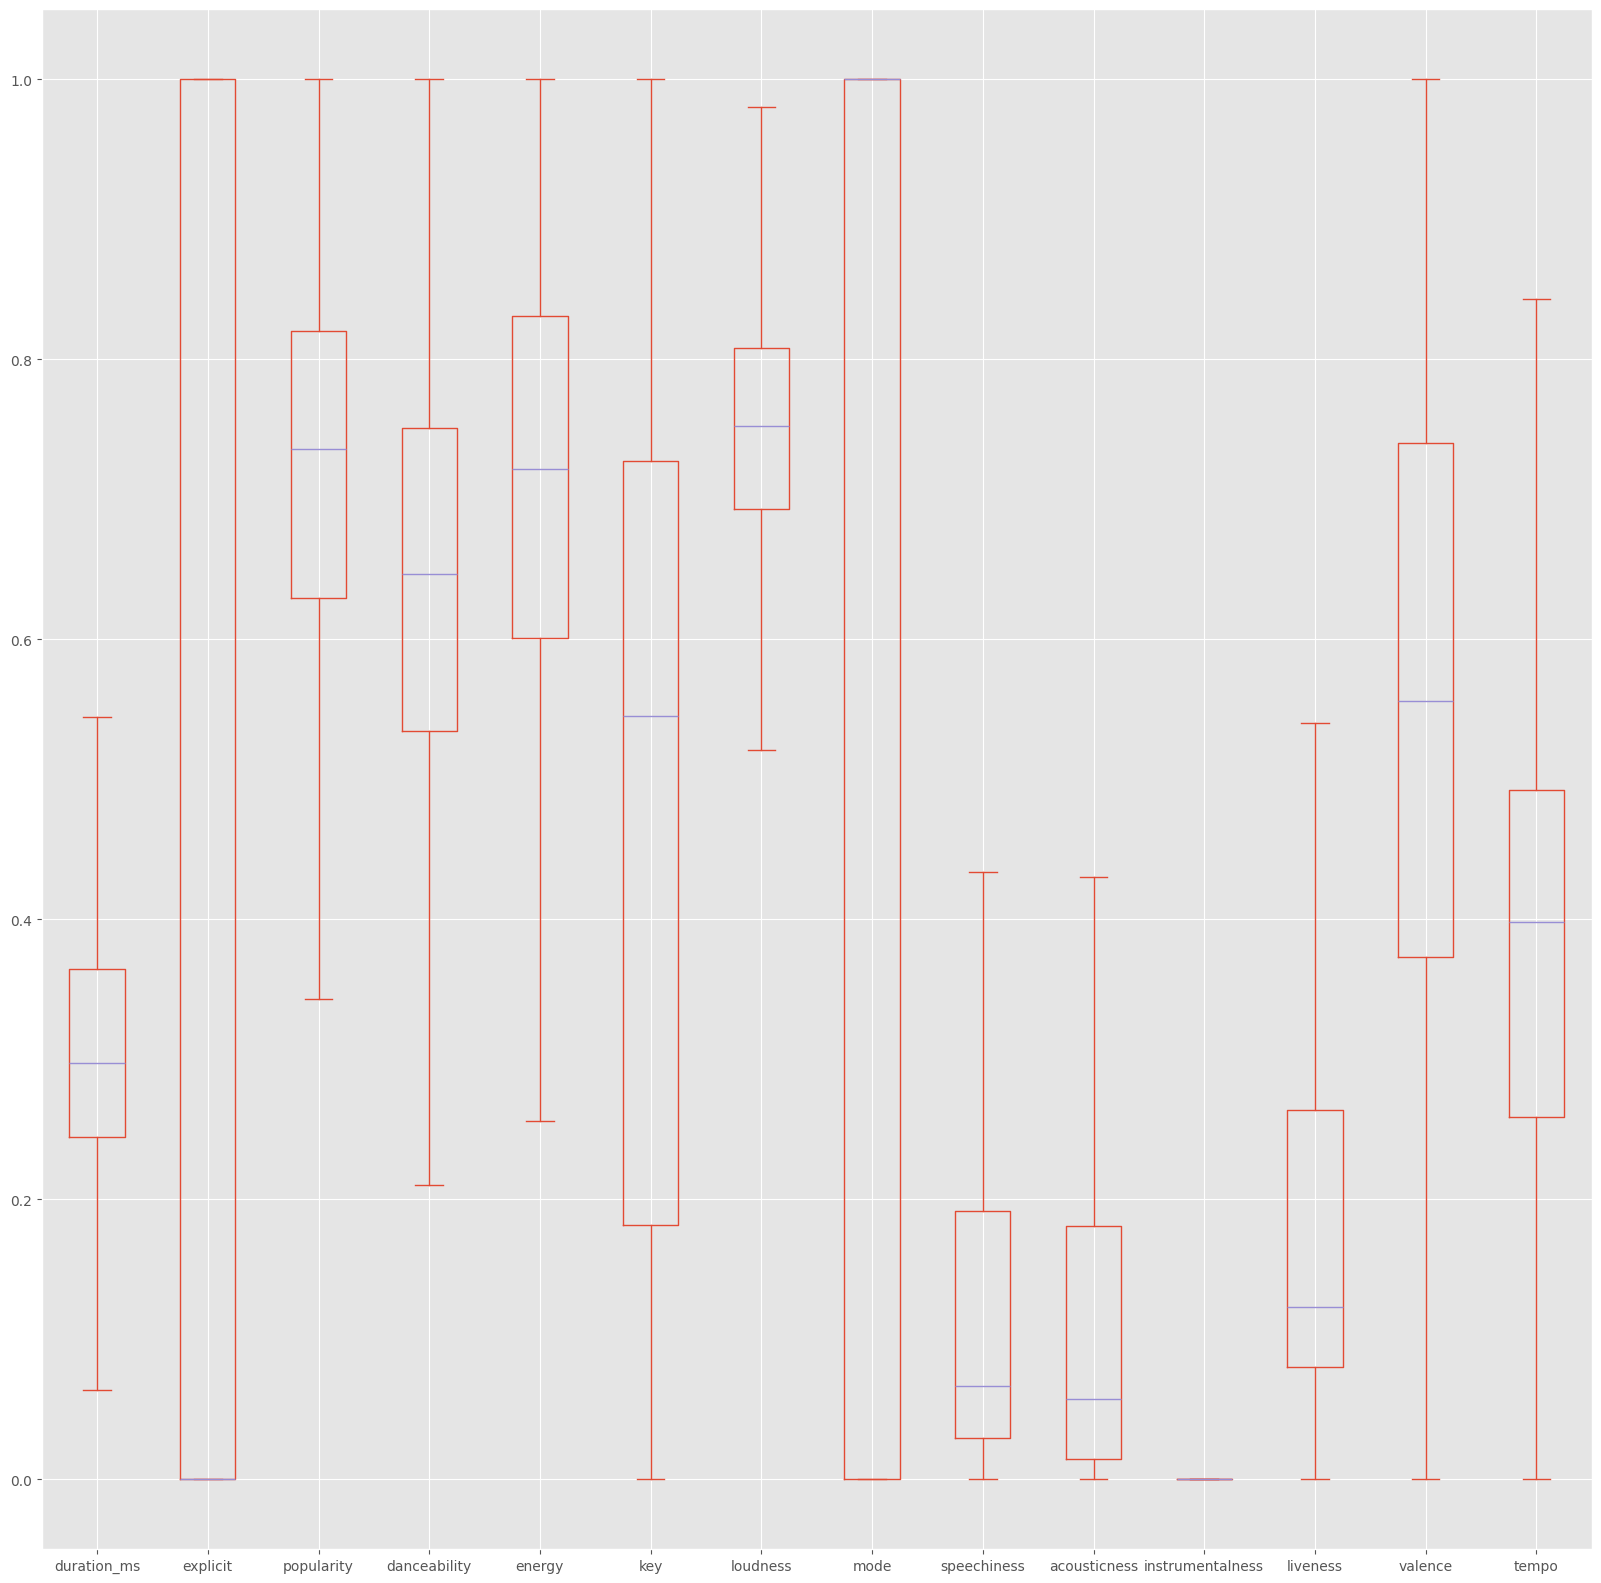

In [83]:
import numpy as np

def cap_outliers(df, columns, threshold=1.5):
    
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR
        # Cap values outside the bounds
        df[col] = np.clip(df[col], lower_bound, upper_bound)
    return df

# Select numeric columns except 'year'
numeric_columns = music_data.select_dtypes(include=['number']).columns
numeric_columns = [col for col in numeric_columns if col != 'year']

# Apply outlier capping
music_data = cap_outliers(music_data, numeric_columns, threshold=1.5)

# Plot the boxplot to verify
music_data[numeric_columns].plot(kind='box', figsize=(20, 20), fontsize=10)



Scatterplot visualization to see patterns of interest

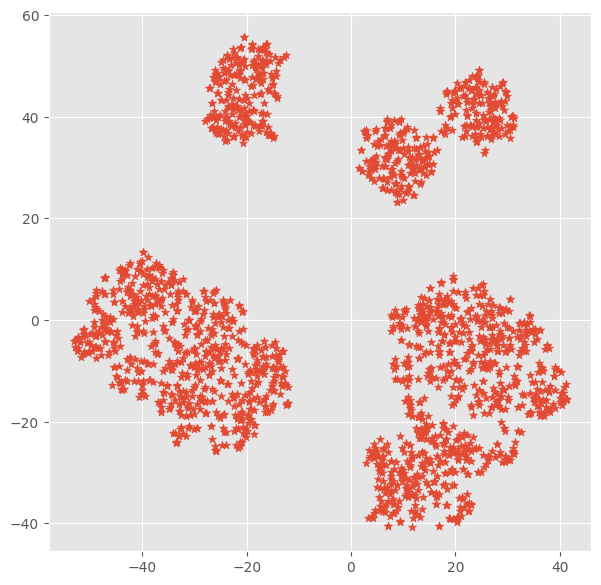

In [84]:
model = TSNE(n_components = 2, random_state = 0)
music_data_modified = music_data.select_dtypes(np.number).drop(columns=['year'])
tsne_data = model.fit_transform(music_data_modified)
plt.style.use('ggplot')
plt.figure(figsize = (7, 7))
plt.scatter(tsne_data[:,0], tsne_data[:,1],  marker= '*')
plt.show()

JOINING THE ENCODED GENRE COLUMNS WITH THE ORIGINAL DATASET

In [85]:
encoded_genres_df = pd.DataFrame(encoded_genres, columns=list(unique_genres))

# Concatenate the encoded genres DataFrame with the original dataset
music_data = pd.concat([music_data, encoded_genres_df], axis=1)

# View the dataset with the encoded genres
music_data.head()

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,...,World/Traditional,Dance/Electronic,R&B,rock,country,R&B,Folk/Acoustic,easy listening,country,pop
0,Britney Spears,Oops!...I Did It Again,0.264478,0.0,2000,0.865169,0.735225,0.825230,0.090909,0.744639,...,0,0,0,0,0,0,0,0,0,0
1,blink-182,All The Small Things,0.145673,0.0,1999,0.887640,0.360520,0.891961,0.000000,0.770630,...,0,0,0,1,0,0,0,0,0,1
2,Faith Hill,Breathe,0.370598,0.0,1999,0.741573,0.472813,0.467217,0.636364,0.568584,...,0,0,0,0,0,0,0,0,1,0
3,Bon Jovi,It's My Life,0.300402,0.0,2000,0.876404,0.498818,0.908908,0.000000,0.812877,...,0,0,0,1,0,0,0,0,0,0
4,*NSYNC,Bye Bye Bye,0.235918,0.0,2000,0.730337,0.573286,0.924796,0.727273,0.776164,...,0,0,0,0,0,0,0,0,0,0


importing the KMeans clustering algorithm that is used to generate categories from music relations

In [86]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=10)
cat = km.fit_predict(num)
music_data['cat'] = cat
normalize_column('cat')

In [87]:
music_data.cat[:10]

0    0.333333
1    0.000000
2    0.111111
3    0.777778
4    0.666667
5    0.111111
6    0.444444
7    1.000000
8    1.000000
9    0.444444
Name: cat, dtype: float64

Visualizing the Clusters with t-SNE

In [88]:
cluster_pipeline = Pipeline([('scaler', StandardScaler()), ('kmeans', KMeans(n_clusters=10))])
X = music_data.select_dtypes(np.number)
cluster_pipeline.fit(X)
music_data['cluster'] = cluster_pipeline.predict(X)

In [89]:
tsne_pipeline = Pipeline([('scaler', StandardScaler()), ('tsne', TSNE(n_components=2, verbose=1))])
genre_embedding = tsne_pipeline.fit_transform(X)
projection = pd.DataFrame(columns=['x', 'y'], data=genre_embedding)
projection['genres'] = music_data['genre']
projection['cluster'] = music_data['cluster']

fig = px.scatter(
    projection, x='x', y='y', color='cluster', hover_data=['x', 'y', 'genres'])
fig.show()

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 2000 samples in 0.000s...
[t-SNE] Computed neighbors for 2000 samples in 0.049s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2000
[t-SNE] Computed conditional probabilities for sample 2000 / 2000
[t-SNE] Mean sigma: 1.773763
[t-SNE] KL divergence after 250 iterations with early exaggeration: 70.425888
[t-SNE] KL divergence after 1000 iterations: 1.233743


In [90]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
X = music_data.select_dtypes(np.number).drop(columns = ['cat','cluster','year']).copy()
y = music_data['cluster']

Splitting the data into train, test and validation sets

In [91]:
X_train, X_rem, y_train, y_rem = train_test_split(X,y, train_size=0.8, random_state=0)

X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.5)

print(X_train.shape), print(y_train.shape)
print(X_valid.shape), print(y_valid.shape)
print(X_test.shape), print(y_test.shape)

(1600, 39)
(1600,)
(200, 39)
(200,)
(200, 39)
(200,)


(None, None)

using various values of K we shall train our model

In [92]:
knn1= KNeighborsClassifier(metric='cosine', algorithm='brute', n_neighbors=1)
knn5= KNeighborsClassifier(metric='cosine', algorithm='brute', n_neighbors=5)
knn10= KNeighborsClassifier(metric='cosine', algorithm='brute', n_neighbors=10)

fitted with both the training and validation data then training data again to learn different patterns and prevent bias

In [93]:
knn5.fit(X_train, y_train)
knn1.fit(X_train, y_train)
knn10.fit(X_train, y_train)

knn5.fit(X_valid, y_valid)
knn1.fit(X_valid, y_valid)
knn10.fit(X_valid, y_valid)

knn5.fit(X_train, y_train)
knn1.fit(X_train, y_train)
knn10.fit(X_train, y_train)

y_pred_5 = knn5.predict(X_valid)
y_pred_1 = knn1.predict(X_valid)
y_pred_10 = knn1.predict(X_valid)

accuracy score

In [94]:
from sklearn.metrics import accuracy_score
print("Accuracy with k=5", accuracy_score(y_valid, y_pred_5)*100)
print("Accuracy with k=1", accuracy_score(y_valid, y_pred_1)*100)
print("Accuracy with k=10", accuracy_score(y_valid, y_pred_10)*100)

Accuracy with k=5 95.0
Accuracy with k=1 95.5
Accuracy with k=10 95.5


Using HyperParameter Tuning

In [95]:
'''import numpy as np
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Feature Selection
selector = SelectKBest(score_func=f_classif, k='all')  # Try reducing features for better accuracy
X_selected = selector.fit_transform(X_scaled, y)

# Split Data
X_train, X_rem, y_train, y_rem = train_test_split(X_selected, y, train_size=0.8, random_state=0)
X_valid, X_test, y_valid, y_test = train_test_split(X_rem, y_rem, test_size=0.5, random_state=0)

# Hyperparameter Grid for KNN
param_grid = {
    'n_neighbors': range(1, 31),  # Extend range of k
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'cosine']
}

# Initialize KNN Classifier
knn = KNeighborsClassifier()

# Grid Search with Cross-Validation
grid_search = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best Parameters and Model
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

best_knn = grid_search.best_estimator_

# Validation Accuracy
y_valid_pred = best_knn.predict(X_valid)
valid_accuracy = accuracy_score(y_valid, y_valid_pred)
print("\nValidation Accuracy:", valid_accuracy * 100)

# Classification Report and Confusion Matrix
print("\nClassification Report:\n", classification_report(y_valid, y_valid_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_valid, y_valid_pred))

# Test Accuracy
y_test_pred = best_knn.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("\nTest Accuracy:", test_accuracy * 100)'''



'import numpy as np\nfrom sklearn.model_selection import GridSearchCV, train_test_split\nfrom sklearn.neighbors import KNeighborsClassifier\nfrom sklearn.metrics import accuracy_score, classification_report, confusion_matrix\nfrom sklearn.preprocessing import StandardScaler\nfrom sklearn.feature_selection import SelectKBest, f_classif\n\n# Feature Scaling\nscaler = StandardScaler()\nX_scaled = scaler.fit_transform(X)\n\n# Feature Selection\nselector = SelectKBest(score_func=f_classif, k=\'all\')  # Try reducing features for better accuracy\nX_selected = selector.fit_transform(X_scaled, y)\n\n# Split Data\nX_train, X_rem, y_train, y_rem = train_test_split(X_selected, y, train_size=0.8, random_state=0)\nX_valid, X_test, y_valid, y_test = train_test_split(X_rem, y_rem, test_size=0.5, random_state=0)\n\n# Hyperparameter Grid for KNN\nparam_grid = {\n    \'n_neighbors\': range(1, 31),  # Extend range of k\n    \'weights\': [\'uniform\', \'distance\'],\n    \'metric\': [\'euclidean\', \'manh

confusion matrix

In [96]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_valid, y_pred_1))
print(confusion_matrix(y_valid, y_pred_5))
print(confusion_matrix(y_valid, y_pred_10))

[[54  0  0  0  0  0  2  0  0]
 [ 0 10  0  0  0  0  0  0  0]
 [ 1  0 31  0  0  0  0  0  0]
 [ 0  0  0 42  0  1  0  0  0]
 [ 0  0  0  0  6  0  0  0  0]
 [ 0  0  0  0  0 24  0  0  0]
 [ 4  0  0  1  0  0 17  0  0]
 [ 0  0  0  0  0  0  0  5  0]
 [ 0  0  0  0  0  0  0  0  2]]
[[54  0  0  1  0  0  1  0  0]
 [ 0 10  0  0  0  0  0  0  0]
 [ 0  0 32  0  0  0  0  0  0]
 [ 0  0  1 41  0  1  0  0  0]
 [ 0  0  0  0  6  0  0  0  0]
 [ 0  0  0  0  0 24  0  0  0]
 [ 5  0  1  0  0  0 16  0  0]
 [ 0  0  0  0  0  0  0  5  0]
 [ 0  0  0  0  0  0  0  0  2]]
[[54  0  0  0  0  0  2  0  0]
 [ 0 10  0  0  0  0  0  0  0]
 [ 1  0 31  0  0  0  0  0  0]
 [ 0  0  0 42  0  1  0  0  0]
 [ 0  0  0  0  6  0  0  0  0]
 [ 0  0  0  0  0 24  0  0  0]
 [ 4  0  0  1  0  0 17  0  0]
 [ 0  0  0  0  0  0  0  5  0]
 [ 0  0  0  0  0  0  0  0  2]]


Classification Report

In [97]:
print(classification_report(y_valid, y_pred_1))
print(classification_report(y_valid, y_pred_5))
print(classification_report(y_valid, y_pred_10))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94        56
           1       1.00      1.00      1.00        10
           2       1.00      0.97      0.98        32
           3       0.98      0.98      0.98        43
           4       1.00      1.00      1.00         6
           5       0.96      1.00      0.98        24
           7       0.89      0.77      0.83        22
           8       1.00      1.00      1.00         5
           9       1.00      1.00      1.00         2

    accuracy                           0.95       200
   macro avg       0.97      0.96      0.97       200
weighted avg       0.95      0.95      0.95       200

              precision    recall  f1-score   support

           0       0.92      0.96      0.94        56
           1       1.00      1.00      1.00        10
           2       0.94      1.00      0.97        32
           3       0.98      0.95      0.96        43
           4       1.00 

Visualizing the prediction

In [98]:
tsne_model = TSNE(n_components = 2, random_state = 0)
tsne_data_X_valid = tsne_model.fit_transform(X_test)

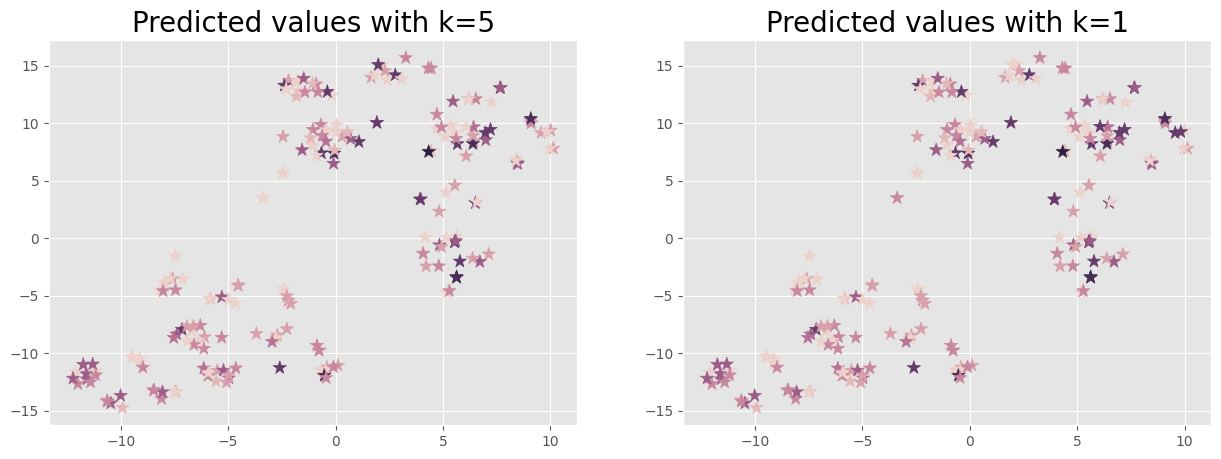

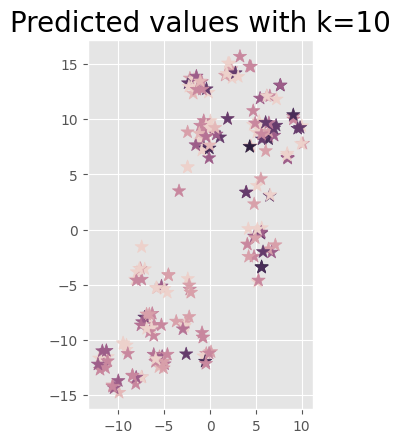

In [99]:
cmap = sb.cubehelix_palette(as_cmap=True)
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
plt.scatter(tsne_data_X_valid[:,0], tsne_data_X_valid[:,1], c=y_pred_5, marker= '*', s=100, cmap=cmap)
plt.title("Predicted values with k=5", fontsize=20)
plt.subplot(1,2,2)
plt.scatter(tsne_data_X_valid[:,0], tsne_data_X_valid[:,1], c=y_pred_1, marker= '*', s=100, cmap=cmap)
plt.title("Predicted values with k=1", fontsize=20)
plt.show()
plt.subplot(1,2,2)
plt.scatter(tsne_data_X_valid[:,0], tsne_data_X_valid[:,1], c=y_pred_10, marker= '*', s=100, cmap=cmap)
plt.title("Predicted values with k=10", fontsize=20)
plt.show()

Developing Recommondation System

In [100]:
from fuzzywuzzy import process
X_test

,duration_ms,explicit,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,...,World/Traditional,Dance/Electronic,R&B,rock,country,R&B,Folk/Acoustic,easy listening,country,pop
278,0.318112,0.0,0.651685,0.478723,0.517000,0.272727,0.674820,1.0,0.002352,0.429932,...,0,0,0,0,0,0,0,0,0,0
1336,0.338805,1.0,0.741573,0.721040,0.865480,1.000000,0.813074,0.0,0.433973,0.022214,...,0,0,0,0,0,0,0,0,0,0
1529,0.287111,0.0,0.707865,0.544917,0.554073,0.909091,0.727147,0.0,0.053546,0.429932,...,0,0,0,1,0,0,0,0,0,0
1326,0.129661,0.0,0.943820,0.664303,0.610211,0.181818,0.693547,1.0,0.024602,0.049469,...,0,0,0,1,0,0,0,0,0,0
823,0.119716,0.0,0.730337,0.562648,0.867599,0.636364,0.769098,0.0,0.011397,0.000557,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
898,0.343331,0.0,0.651685,0.711584,0.538185,0.181818,0.813717,1.0,0.195007,0.195681,...,0,0,1,0,0,0,0,0,0,0
191,0.343870,1.0,0.707865,0.578014,0.835822,0.090909,0.813470,0.0,0.433973,0.018218,...,0,0,0,0,0,0,0,0,0,0
1256,0.355763,0.0,0.887640,0.561466,0.775448,0.000000,0.832098,0.0,0.144356,0.069551,...,0,1,0,0,0,0,0,0,0,1
1618,0.351587,1.0,0.842697,0.440898,0.774388,0.818182,0.797312,0.0,0.433973,0.261256,...,0,0,0,0,0,0,0,0,0,1


In [101]:
recommendation_set = music_data.merge(X_test, how = 'inner' ,indicator=False)
recommendation_set

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,...,R&B,rock,country,R&B,Folk/Acoustic,easy listening,country,pop,cat,cluster
0,Sisqo,Thong Song,0.379185,1.0,1999,0.775281,0.682033,0.882428,0.181818,0.669780,...,1,0,0,0,0,0,0,1,0.111111,5
1,Eminem,The Real Slim Shady,0.461274,1.0,2000,0.966292,0.969267,0.641987,0.454545,0.803933,...,0,0,0,0,0,0,0,0,0.444444,3
2,Modjo,Lady - Hear Me Tonight,0.523118,0.0,2001,0.865169,0.698582,0.797691,0.545455,0.735596,...,0,0,0,0,0,0,0,0,0.444444,8
3,Alice Deejay,Better Off Alone,0.274509,0.0,2000,0.820225,0.640662,0.873954,0.727273,0.709803,...,0,0,0,0,0,0,0,0,0.333333,0
4,Dr. Dre,The Next Episode,0.130693,1.0,1999,0.921348,0.937352,0.904671,0.909091,0.893616,...,0,0,0,0,0,0,0,0,0.000000,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204,Ed Sheeran,Take Me Back to London (feat. Stormzy),0.206746,1.0,2019,0.741573,0.893617,0.748967,0.727273,0.741229,...,0,0,0,0,0,0,0,0,0.666667,0
205,Stormzy,Vossi Bop,0.224348,1.0,2019,0.719101,0.653664,0.633513,0.727273,0.714102,...,0,0,0,0,0,0,0,0,0.666667,3
206,Ed Sheeran,Cross Me (feat. Chance the Rapper & PnB Rock),0.251076,1.0,2019,0.719101,0.729314,0.775448,0.363636,0.698735,...,0,0,0,0,0,0,0,0,0.333333,0
207,NSG,Options,0.342402,1.0,2020,0.640449,0.835697,0.599619,0.090909,0.782192,...,0,0,0,0,0,0,0,0,0.111111,6


Function For Recommondation of songs

In [102]:
def recommender(song_name, data,model):
    idx=process.extractOne(song_name, recommendation_set['song'])[2]
    print('Song Selected:-',recommendation_set['song'][idx], 'Index: ',idx)
    print('Searching for recommendations.....')
    requiredSongs = recommendation_set.select_dtypes(np.number).drop(columns = ['cat','cluster','year']).copy()
    distances, indices = model.kneighbors(requiredSongs.iloc[idx].values.reshape(1,-1))
    for i in indices:
        print(music_data['song'][i] + "      " + music_data['artist'][i])

Function to get song info

In [103]:
def get_song_info(row_number):
    song_info = recommendation_set.loc[row_number, ["song", "artist"]]
    return song_info

song_info = get_song_info(2)
print("Song name: ", song_info["song"])
print("Artist name: ", song_info["artist"])

Song name:  Lady - Hear Me Tonight
Artist name:  Modjo


In [104]:
song_name = song_info["song"]
recommender(song_name,X_test, knn5)

Song Selected:- Lady - Hear Me Tonight Index:  2
Searching for recommendations.....
84                Pure Shores      All Saints
941           Fight For This Love      Cheryl
1332              White Noise      Disclosure
1403                   Fancy      Iggy Azalea
308     All The Things She Said      t.A.T.u.
dtype: object


Using lime to visualize predictions

<Figure size 1200x800 with 0 Axes>

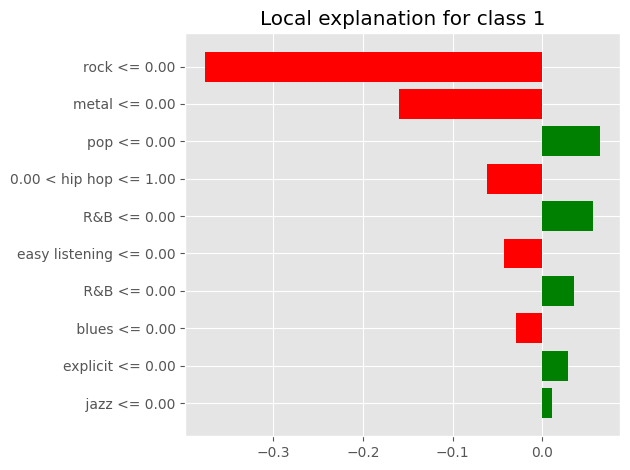

In [105]:
import lime
import lime.lime_tabular

# Create an instance of the LIME explainer
explainer = lime.lime_tabular.LimeTabularExplainer(X_train.values, feature_names=X_train.columns, class_names=knn5.classes_, discretize_continuous=True)

# Calculate the LIME explanation for a sample from the test data
exp = explainer.explain_instance(X_valid.iloc[0,:].values, knn5.predict_proba, num_features=10)

# Access the LIME explanation values
lime_values = exp.local_exp[1]

fig = plt.figure(figsize=(12, 8))
exp.as_pyplot_figure()
plt.tight_layout()